#### Sahil Sarna
#### 109918198
#### Homework 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import os
a4_dims = (11.7, 8.27)

Import the Data

In [2]:
bnbData = pd.read_csv("/Users/sahilsarna/Documents/CSE351/HW1/archive/AB_NYC_2019.csv")

Display Original Data

In [3]:
bnbData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05/07/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/18,0.10,1,0


Checking if all the records have a unique id

In [4]:
bnbData['id'].is_unique

True

I'm going to sort all the data in the ascending order of their IDs.

In [5]:
bnbData = bnbData.sort_values('id')

Since ID column is unique, I'm going to change all the label location to their IDs

In [6]:
bnbData = bnbData.set_index('id', drop=False)
bnbData.index.name = None

Making an update function for central tendencies

In [7]:
def updatePriceCTs():
    priceMean = round(bnbData['price'].mean(),2)
    priceMedian = bnbData['price'].median()
    priceSD = round(bnbData['price'].std(),2)
    print("Price Mean:", priceMean)
    print("Price Median:", priceMedian)
    print("Price SD:", priceSD)

Making an update function to see size changes

In [8]:
def updateDataSize():
    newSize = len(bnbData.index)
    print("Updated Number of records: ", newSize)
    print("Difference: ", originalSize-newSize)
    print("Percentage of change: ", 100-(newSize*100/originalSize))

Task 1 : Data Cleaning

In [9]:
originalSize = len(bnbData.index)
print("Starting No. of Records:", originalSize)
updatePriceCTs()

Starting No. of Records: 48895
Price Mean: 152.72
Price Median: 106.0
Price SD: 240.15


In [10]:
bnbData['name'] = bnbData['name'].astype(str)
duplicate_rows = bnbData[bnbData.duplicated(['name'], keep="first")]
duplicate_rows.sort_values(by='name').head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
7858673,7858673,#NAME?,31304940,John,Brooklyn,Williamsburg,40.71767,-73.96252,Private room,60,2,92,08/06/19,1.94,8,87
8341556,8341556,#NAME?,43298076,Gordon M,Manhattan,Harlem,40.82323,-73.95494,Private room,55,2,84,26/05/19,1.82,4,72
7886635,7886635,#NAME?,31304940,John,Brooklyn,Williamsburg,40.71636,-73.96246,Private room,60,2,97,18/06/19,2.13,8,122
8192443,8192443,#NAME?,31304940,John,Brooklyn,Williamsburg,40.71596,-73.96215,Private room,60,2,106,23/06/19,2.29,8,104
9698992,9698992,#NAME?,43298076,Gordon M,Manhattan,Harlem,40.82195,-73.95373,Private room,62,2,24,14/06/19,0.55,4,97


Drop all the duplicate records but keep first instance

In [11]:
bnbData = bnbData.drop_duplicates(subset='name')

Filling in null values for last_review and reviews_per_month

In [12]:
bnbData.loc[bnbData.loc[:,"last_review"].isnull(), "last_review"] = "01/01/00"

In [13]:
bnbData.loc[bnbData.loc[:,"reviews_per_month"].isnull(), "reviews_per_month"] = 0

In [14]:
bnbData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47897 entries, 2539 to 36487245
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47897 non-null  int64  
 1   name                            47897 non-null  object 
 2   host_id                         47897 non-null  int64  
 3   host_name                       47876 non-null  object 
 4   neighbourhood_group             47897 non-null  object 
 5   neighbourhood                   47897 non-null  object 
 6   latitude                        47897 non-null  float64
 7   longitude                       47897 non-null  float64
 8   room_type                       47897 non-null  object 
 9   price                           47897 non-null  int64  
 10  minimum_nights                  47897 non-null  int64  
 11  number_of_reviews               47897 non-null  int64  
 12  last_review               

Drop all null value records as there are only a few left.

In [15]:
bnbData.dropna(inplace=True)
bnbData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47876 entries, 2539 to 36487245
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              47876 non-null  int64  
 1   name                            47876 non-null  object 
 2   host_id                         47876 non-null  int64  
 3   host_name                       47876 non-null  object 
 4   neighbourhood_group             47876 non-null  object 
 5   neighbourhood                   47876 non-null  object 
 6   latitude                        47876 non-null  float64
 7   longitude                       47876 non-null  float64
 8   room_type                       47876 non-null  object 
 9   price                           47876 non-null  int64  
 10  minimum_nights                  47876 non-null  int64  
 11  number_of_reviews               47876 non-null  int64  
 12  last_review               

In [16]:
updateDataSize()
updatePriceCTs()

Updated Number of records:  47876
Difference:  1019
Percentage of change:  2.0840576746088573
Price Mean: 153.13
Price Median: 107.0
Price SD: 241.72


#### Making a box plot of prices to see outliers

To remove these let's check the mean and median for the data right now.

In [17]:
updatePriceCTs()
Q1 = bnbData['price'].quantile(0.25)
Q3 = bnbData['price'].quantile(0.75)
IQR = Q3 - Q1
whisk = 7.78 #whisker coeff
print("Q1 = ", Q1)
print("Q3 = ", Q3)
print("IQR = ", IQR)

Price Mean: 153.13
Price Median: 107.0
Price SD: 241.72
Q1 =  69.0
Q3 =  175.0
IQR =  106.0


Current Box Play with whisker coeff = 7.78 (7.78 to get treat values only values over 1000 as outliers)

<AxesSubplot:xlabel='price'>

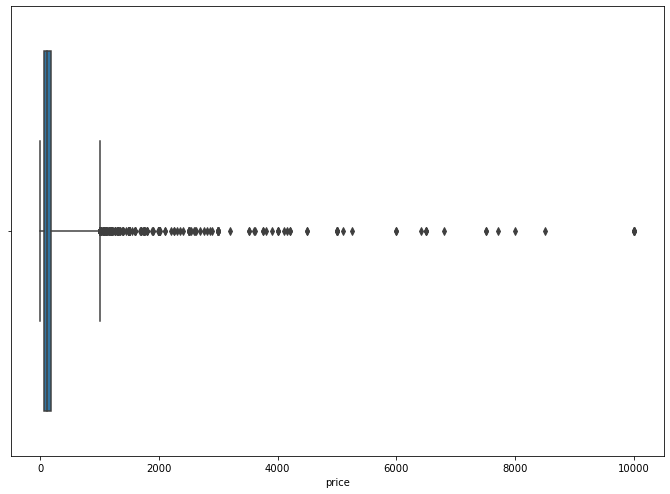

In [18]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x=bnbData['price'],whis=whisk,ax=ax)

In [19]:
((bnbData['price'] < (Q1 - whisk * IQR)) | (bnbData['price'] > (Q3 + whisk * IQR))).sum()

293

As we can see there are only 293 records with price over 1000, meaning removing these values will not result in a major change in our data set as it represents pretty small percentage of the dataset. 

I know there can be prices above 1000, but the amount of data above that is very less and since the bulk of our data is around 0-500, I chose that 1000 is good place to cap of the price. Otherwise these records change the central tendencies and make the data a little less clean in my opinion. 

Current Histogram

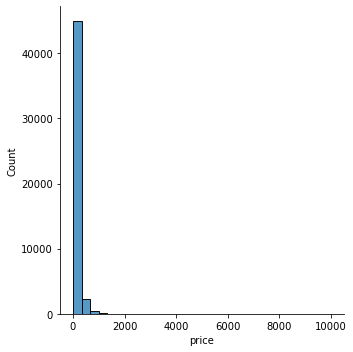

In [20]:
sns.displot(bnbData['price'], bins=30)

As we can see the majority of the data is around the range of 0-575 (175(Q3)+7.78(whisk)*106(IQR)) so all the values above 1000 we can definitely consider outliers for this dataset.

In [21]:
updateDataSize()

Updated Number of records:  47876
Difference:  1019
Percentage of change:  2.0840576746088573


Removing the outliers

In [22]:
bnbData = bnbData[~((bnbData['price'] < (Q1 - whisk*IQR)) | (bnbData['price'] > (Q3 + whisk*IQR)))]

Cleaned Box Plot

<AxesSubplot:xlabel='price'>

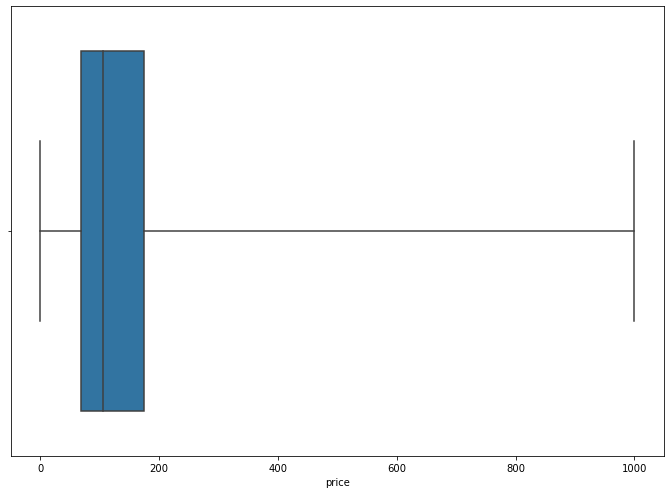

In [23]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x=bnbData['price'],whis=whisk,ax=ax)

Cleaned Histogram

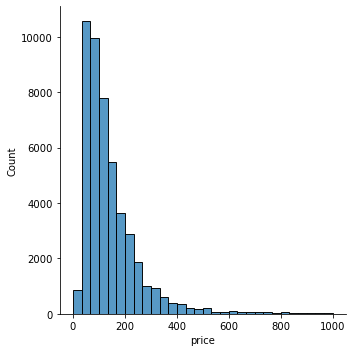

In [24]:
sns.displot(bnbData['price'], bins=30)

Cleaned Data Upate

In [25]:
updateDataSize()

Updated Number of records:  47583
Difference:  1312
Percentage of change:  2.683300951017486


Central Tendencies after Cleaning

In [26]:
updatePriceCTs()

Price Mean: 140.52
Price Median: 105.0
Price SD: 113.18


Checking for Null Values

In [27]:
bnbData.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Dropping records with No "host_name" 

In [28]:
bnbData = bnbData.dropna(subset=["host_name"])
bnbData.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Present Price mean of the data

In [29]:
updatePriceCTs()

Price Mean: 140.52
Price Median: 105.0
Price SD: 113.18


Replacing price values from 0 to 30 with NaN to use interpolation later. 
I'm doing this as I think the price under $30 is quite unreasonable and not realistic at all. 

In [30]:
bnbData['price'].replace(range(0,30), np.nan, inplace=True)
bnbData.isnull().sum() 

id                                  0
name                                0
host_id                             0
host_name                           0
neighbourhood_group                 0
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                             393
minimum_nights                      0
number_of_reviews                   0
last_review                         0
reviews_per_month                   0
calculated_host_listings_count      0
availability_365                    0
dtype: int64

As we can see, total number of records that we changed is only 393, so we are not making a major change in the data.

Looking up values with NaN and then using interpolation to give them a value other than the original.

In [31]:
bnbData = bnbData.interpolate()
bnbData.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Price mean after changing the values

In [32]:
updatePriceCTs()

Price Mean: 141.45
Price Median: 109.0
Price SD: 112.9


Not a major shift so that is good. 

In [33]:
updateDataSize()

Updated Number of records:  47583
Difference:  1312
Percentage of change:  2.683300951017486


Cleaning the listing names using regex to only include a-z, A-Z, space ( ), and digits (0-9)

In [34]:
bnbData['name'] = bnbData.name.str.replace("(?i)[^0-9a-zA-Z ]",'')

Cleaning the host names using regex to only include a-z, A-Z, space ( ), and '&'

In [35]:
bnbData['host_name'] = bnbData.host_name.str.replace("[^a-zA-Z &]",'')

Saving the Clean Data to a CSV File

In [36]:
bnbData.to_csv(r"/Users/sahilsarna/Documents/CSE351/HW1/archive/AB_NYC_2019Clean.csv", index=False)

_______

## TASK 2A

List of Neighbourhood Groups

In [37]:
neighbourhoodGroupList = bnbData['neighbourhood_group'].unique().tolist()
print(neighbourhoodGroupList)

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']


__Brooklyn__

In [38]:
brooklynGroup = pd.DataFrame(bnbData[bnbData["neighbourhood_group"]=="Brooklyn"])
brooklynGroup['neighbourhood'].value_counts().tail()

Dyker Heights      11
Bergen Beach        9
Manhattan Beach     8
Sea Gate            4
Mill Basin          4
Name: neighbourhood, dtype: int64

Removing all neighbourhoods in Brooklyn that have a frequency less than 5

In [39]:
counts = brooklynGroup['neighbourhood'].value_counts() # Store count
counts = counts[counts > 5]
brooklynGroup = brooklynGroup[brooklynGroup['neighbourhood'].isin(counts.index)]
brooklynGroup['neighbourhood'].value_counts().tail()

Bath Beach         17
Navy Yard          14
Dyker Heights      11
Bergen Beach        9
Manhattan Beach     8
Name: neighbourhood, dtype: int64

Brooklyn Top 5 Neighbourhood Based on Price

In [40]:
brooklynTBGroup = pd.DataFrame(brooklynGroup.groupby("neighbourhood")['price'].mean().round(2))
brooklynTBGroup.sort_values(by='price',ascending=False).head(5)

,price
neighbourhood,
DUMBO,194.45
Brooklyn Heights,188.01
Cobble Hill,187.95
Vinegar Hill,187.18
Park Slope,172.04


Brooklyn Bottom 5 Neighbourhood Based on Price

In [41]:
brooklynTBGroup.sort_values(by='price',ascending=True).head(5)

,price
neighbourhood,
Borough Park,64.29
Brownsville,76.84
Bensonhurst,81.24
Bath Beach,81.76
Midwood,82.86


__Manhattan__

In [42]:
manhattanGroup = pd.DataFrame(bnbData[bnbData["neighbourhood_group"]=="Manhattan"])
manhattanGroup['neighbourhood'].value_counts().tail()

Two Bridges          72
Battery Park City    68
Civic Center         50
Stuyvesant Town      35
Marble Hill          12
Name: neighbourhood, dtype: int64

Manhattan Top 5 Neighbourhood Based on Price

In [43]:
manhattanTBGroup = pd.DataFrame(manhattanGroup.groupby("neighbourhood")['price'].mean().round(2))
manhattanTBGroup.sort_values(by='price',ascending=False).head(5)

,price
neighbourhood,
Tribeca,310.09
Flatiron District,277.59
NoHo,277.53
Midtown,263.62
SoHo,250.65


Manhattan Bottom 5 Neighbourhood Based on Price

In [44]:
manhattanTBGroup.sort_values(by='price',ascending=True).head(5)

,price
neighbourhood,
Marble Hill,89.17
Washington Heights,90.77
Inwood,91.35
Roosevelt Island,96.91
Morningside Heights,112.14


__Queens__

In [45]:
queensGroup = pd.DataFrame(bnbData[bnbData["neighbourhood_group"]=="Queens"])
queensGroup['neighbourhood'].value_counts().tail()

Bay Terrace     6
Little Neck     5
Holliswood      4
Neponsit        3
Breezy Point    2
Name: neighbourhood, dtype: int64

Removing all neighbourhoods in Queens that have a frequency less than 5

In [46]:
counts = queensGroup['neighbourhood'].value_counts() # Store count
counts = counts[counts > 5]
queensGroup = queensGroup[queensGroup['neighbourhood'].isin(counts.index)]
queensGroup['neighbourhood'].value_counts().tail()

Edgemere         10
Jamaica Hills     8
Belle Harbor      8
Douglaston        8
Bay Terrace       6
Name: neighbourhood, dtype: int64

Queens Top 5 Neighbourhood Based on Price

In [47]:
queensTBGroup = pd.DataFrame(queensGroup.groupby("neighbourhood")['price'].mean().round(2))
queensTBGroup.sort_values(by='price',ascending=False).head(5)

,price
neighbourhood,
Jamaica Estates,182.95
Belle Harbor,171.50
Far Rockaway,168.75
Arverne,155.97
Bay Terrace,142.00


Queens Bottom 5 Neighbourhood Based on Price

In [48]:
queensTBGroup.sort_values(by='price',ascending=True).head(10)

,price
neighbourhood,
Woodhaven,70.01
Ridgewood,79.31
Rosedale,79.82
Elmhurst,81.51
East Elmhurst,81.59


__Staten Island__

In [49]:
statenIslandGroup = pd.DataFrame(bnbData[bnbData["neighbourhood_group"]=="Staten Island"])
statenIslandGroup['neighbourhood'].value_counts().tail()

Woodrow         1
Richmondtown    1
New Dorp        1
Rossville       1
Willowbrook     1
Name: neighbourhood, dtype: int64

Removing all neighbourhoods in Staten Island that have a frequency less than 5

In [50]:
counts = statenIslandGroup['neighbourhood'].value_counts() # Store count
counts = counts[counts > 5]
statenIslandGroup = statenIslandGroup[statenIslandGroup['neighbourhood'].isin(counts.index)]
statenIslandGroup['neighbourhood'].value_counts().tail()

Dongan Hills     7
Bull's Head      6
Grant City       6
Tottenville      6
Midland Beach    6
Name: neighbourhood, dtype: int64

Staten Island Top 5 Neighbourhood Based on Price

In [51]:
statenIslandTBGroup = pd.DataFrame(statenIslandGroup.groupby("neighbourhood")['price'].mean().round(2))
statenIslandTBGroup.sort_values(by='price',ascending=False).head(5)

,price
neighbourhood,
Grymes Hill,159.14
Tottenville,156.50
Shore Acres,152.71
Arrochar,115.00
Rosebank,111.86


Staten Island Bottom 5 Neighbourhood Based on Price

In [52]:
statenIslandTBGroup.sort_values(by='price',ascending=True).head(5)

,price
neighbourhood,
Grant City,61.72
Concord,68.98
Tompkinsville,75.85
New Springville,76.00
Dongan Hills,79.43


__Bronx__

In [53]:
bronxGroup = pd.DataFrame(bnbData[bnbData["neighbourhood_group"]=="Staten Island"])
bronxGroup['neighbourhood'].value_counts().tail()

Woodrow         1
Richmondtown    1
New Dorp        1
Rossville       1
Willowbrook     1
Name: neighbourhood, dtype: int64

Removing all neighbourhoods in Bronx that have a frequency less than 5

In [54]:
counts = bronxGroup['neighbourhood'].value_counts() # Store count
counts = counts[counts > 5]
bronxGroup = bronxGroup[bronxGroup['neighbourhood'].isin(counts.index)]
bronxGroup['neighbourhood'].value_counts().tail()

Dongan Hills     7
Bull's Head      6
Grant City       6
Tottenville      6
Midland Beach    6
Name: neighbourhood, dtype: int64

Bronx Top 5 Neighbourhood Based on Price

In [55]:
bronxTBGroup = pd.DataFrame(bronxGroup.groupby("neighbourhood")['price'].mean().round(2))
bronxTBGroup.sort_values(by='price',ascending=False).head(5)

,price
neighbourhood,
Grymes Hill,159.14
Tottenville,156.50
Shore Acres,152.71
Arrochar,115.00
Rosebank,111.86


Bronx Bottom 5 Neighbourhood Based on Price

In [56]:
bronxTBGroup.sort_values(by='price',ascending=True).head(5)

,price
neighbourhood,
Grant City,61.72
Concord,68.98
Tompkinsville,75.85
New Springville,76.00
Dongan Hills,79.43


## TASK 2B

Making a dataframe of all the neighbourhood groups with their average prices and listing count

In [57]:
bnbNGroupData = pd.DataFrame(bnbData.groupby("neighbourhood_group")["neighbourhood"].count()) 
bnbNGroupData["average_price"] = pd.DataFrame(bnbData.groupby("neighbourhood_group")["price"].mean())
bnbNGroupData

,neighbourhood,average_price
neighbourhood_group,,
Bronx,1065,91.154617
Brooklyn,19589,118.685327
Manhattan,21013,177.915600
Queens,5550,96.138853
Staten Island,366,99.092441


<AxesSubplot:xlabel='neighbourhood_group', ylabel='average_price'>

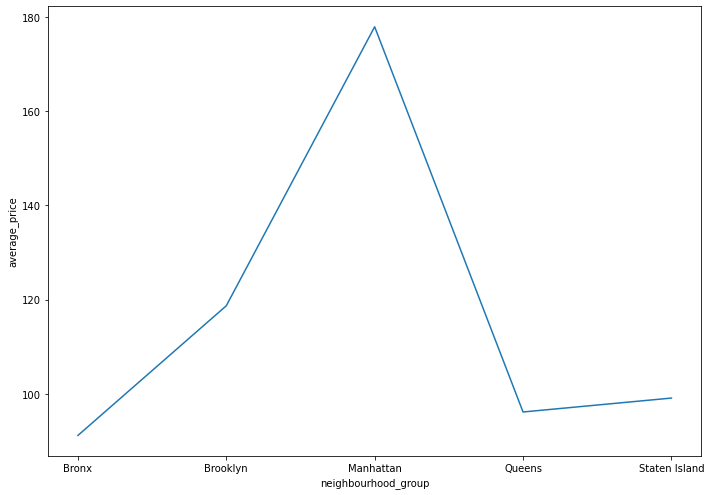

In [58]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(
    x=bnbNGroupData.index, 
    y=bnbNGroupData.loc[:,"average_price"], 
    data=bnbNGroupData,
    ax=ax
)

<AxesSubplot:xlabel='neighbourhood_group', ylabel='average_price'>

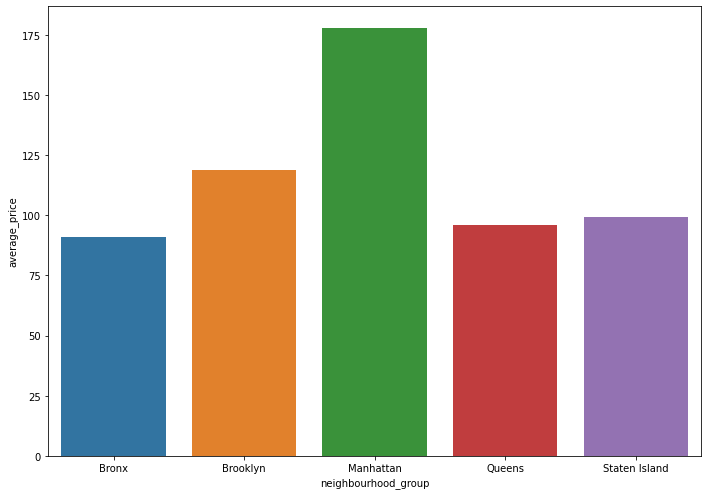

In [59]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(
    x=bnbNGroupData.index, 
    y=bnbNGroupData.loc[:,"average_price"],
    data=bnbNGroupData,
    ax=ax
)

From the two graphs above we can see that:
- __Manhattan is the most expensive area__, this could be due to Manhattan being in the middle of all the other neighbourhood groups
- __Bronx is the most cheapest area__

_______

## TASK 3

For this task to find correlation I'm choosing:
- price
- minimum_nights
- number_of_reviews
- calculated_host_listing_count
- availability_365
- reviews_per_month

In [60]:
relationData = bnbData[['price','minimum_nights','number_of_reviews','calculated_host_listings_count',"availability_365","reviews_per_month"]]

Making a table that lists all the correlations between each variable

In [61]:
relationDataCorr = relationData.corr()
relationDataCorr

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,reviews_per_month
price,1.000000,0.019797,-0.058829,0.133986,0.117709,-0.054202
minimum_nights,0.019797,1.000000,-0.079784,0.127612,0.141255,-0.124621
number_of_reviews,-0.058829,-0.079784,1.000000,-0.072245,0.176188,0.588672
calculated_host_listings_count,0.133986,0.127612,-0.072245,1.000000,0.225215,-0.045887
availability_365,0.117709,0.141255,0.176188,0.225215,1.000000,0.167784
reviews_per_month,-0.054202,-0.124621,0.588672,-0.045887,0.167784,1.000000


Plotting the Heat Map

<AxesSubplot:>

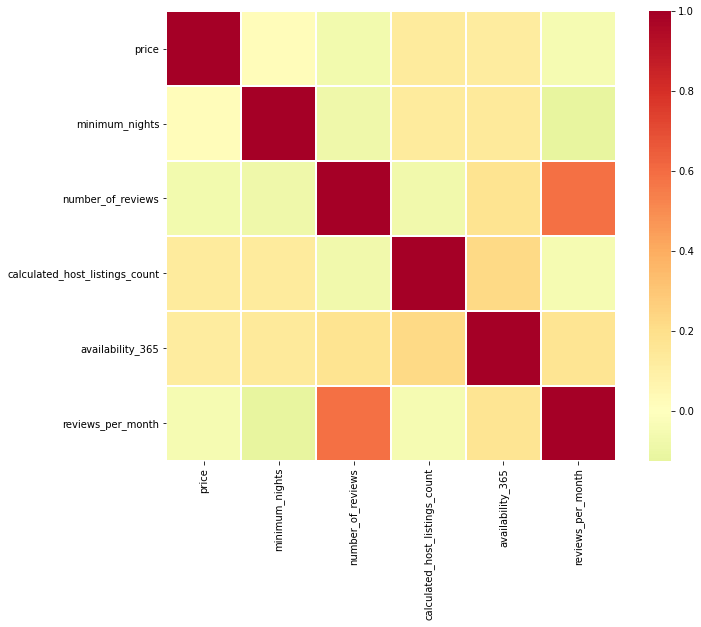

In [62]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(relationDataCorr,square=True,linewidth=1,cmap=("RdYlGn_r"),center=0)

- The Most Positive Correlation: __0.588672 (reviews_per_month and number_of_reviews)__
- The Most Negative Correlation: __-0.124621 (reviews_per_month and minimum_nights)__

_________

## TASK 4A

Assigning colors to each neighbourhood group for the Scatter Plot

In [63]:
color_dict = dict({'Brooklyn':'brown',
                  'Manhattan':'green',
                  'Queens': 'orange',
                  'Staten Island': 'red',
                   'Bronx': 'dodgerblue'})

Plotting the Scatter Plot using the latitude on y-axis and longitude on x-axis

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

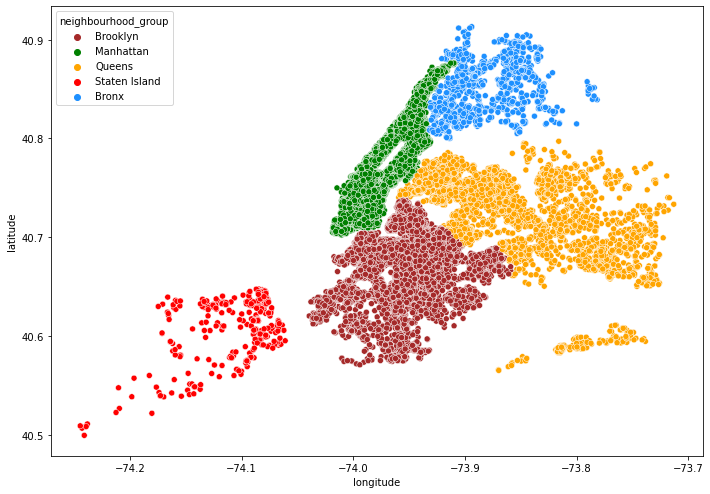

In [64]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(y=bnbData.latitude,x=bnbData.longitude,hue=bnbData.neighbourhood_group,ax=ax,palette=color_dict)

## TASK 4B

Plotting the Scatter Plot using the latitude on y-axis and longitude on x-axis, using the colormap "twilight" from matplotlib which will show us high prices in dark color and low prices in light color. 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

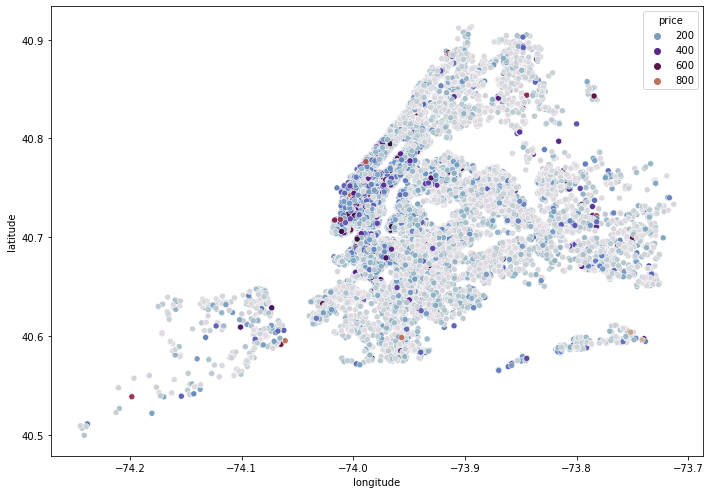

In [65]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(y=bnbData.latitude,x=bnbData.longitude,hue=bnbData.price,ax=ax,palette="twilight")

Looking at the Scatter Plot, we can easily tell that __Manhattan__ is the most expensive neighbourhood group.

______

## TASK 5

In [66]:
from wordcloud import WordCloud

Converting all the listing names from the clean data to string

In [67]:
text = bnbData['name'].to_string()

Generating the Word Cloud

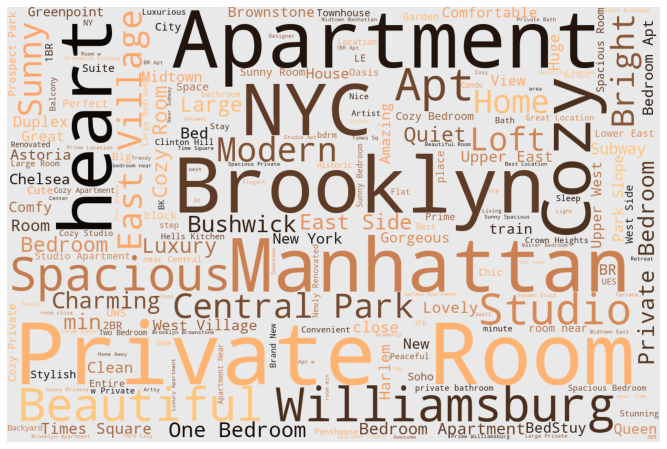

In [68]:
wCloud = WordCloud(background_color="#E9E9E9",max_words=200,width=1200, height=800,colormap="copper").generate(text)
plt.figure(figsize=a4_dims)
plt.imshow(wCloud)
plt.axis("off")
plt.show()

_______

## Task 6

Generating a Dataframe with Top 3 Unique Hosts from each Neighbourhood Group based on "calculated_host_listings_count"

In [69]:
busyHostData = bnbData.sort_values("calculated_host_listings_count", ascending=False).drop_duplicates(subset="host_id").groupby('neighbourhood_group').head(3)

In [70]:
busyHostData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32634514,32634514,Sonder Stock Exchange Pristine 2BR Sofa Bed,219517861,Sonder NYC,Manhattan,Financial District,40.70575,-74.01231,Entire home/apt,407.0,2,9,23/06/19,2.18,327,294
30394324,30394324,Chic Midtown East 1BR w Doorman Gym Sundecks ...,107434423,Blueground,Manhattan,Kips Bay,40.73960,-73.97938,Entire home/apt,240.0,30,0,01/01/00,0.00,232,249
12111387,12111387,Luxury 2BRApt next to Central Park,30283594,Kara,Manhattan,Midtown,40.76537,-73.98298,Entire home/apt,369.0,30,0,01/01/00,0.00,121,345
30435549,30435549,Lux Condo RM near Manhattan LGA Laundry GYM,137358866,Kazuya,Queens,Maspeth,40.74027,-73.90146,Private room,49.0,30,0,01/01/00,0.00,103,251
2214710,2214710,Beautiful 2BR Flex Factory Loft,7503643,Vida,Brooklyn,Greenpoint,40.72572,-73.94031,Entire home/apt,159.0,30,0,01/01/00,0.00,52,349
29170235,29170235,Home For Medical Professionals The Palatine,26377263,Stat,Brooklyn,East Flatbush,40.65405,-73.93657,Private room,53.0,30,0,01/01/00,0.00,43,311
28536037,28536037,EXCELLENT location 2min 7 line 61st Express t...,19303369,Hiroki,Queens,Woodside,40.74474,-73.90314,Private room,47.0,30,0,01/01/00,0.00,37,1
27573861,27573861,Brooklyn Style Hostel Private Room 5,119669058,Melissa,Brooklyn,Bedford-Stuyvesant,40.69459,-73.95561,Private room,55.0,2,13,02/05/19,1.19,34,330
33907003,33907003,Unique Private BR in Ridgewood Woodbine,242962235,Yuval,Queens,Ridgewood,40.70810,-73.89507,Private room,34.0,30,0,01/01/00,0.00,23,278
4963237,4963237,DOMINIQUES NYC cosy2 bedrm crashPadStay here,310670,Vie,Bronx,Eastchester,40.87829,-73.83471,Entire home/apt,155.0,2,11,19/05/19,0.29,13,348


Generating a Data Frame with all the listings of busy hosts from above using their IDs

In [71]:
busyHostIDList = busyHostData.host_id.tolist()
allBusyHostListingData = pd.DataFrame()
for x in busyHostIDList:
    temp = bnbData[bnbData.host_id == x]
    allBusyHostListingData = allBusyHostListingData.append(temp)

Displaying the Data

In [72]:
allBusyHostListingData

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
30181691,30181691,Sonder 180 Water Incredible 2BR Rooftop,219517861,Sonder NYC,Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302.0,29,0,01/01/00,0.00,327,309
30181945,30181945,Sonder 180 Water Premier 1BR Rooftop,219517861,Sonder NYC,Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229.0,29,1,29/05/19,0.73,327,219
30347708,30347708,Sonder 180 Water Charming 1BR Rooftop,219517861,Sonder NYC,Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232.0,29,1,21/05/19,0.60,327,159
30937590,30937590,Sonder The Nash Artsy 1BR Rooftop,219517861,Sonder NYC,Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262.0,2,8,09/06/19,1.86,327,91
30937591,30937591,Sonder The Nash Lovely Studio Rooftop,219517861,Sonder NYC,Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255.0,2,14,10/06/19,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16097822,16097822,Newly renovated Room for 1,104927746,Amardeep,Staten Island,South Beach,40.59587,-74.08614,Private room,35.0,4,10,22/05/19,0.34,7,323
16098175,16098175,Writers Paradise 3 NYC,104927746,Amardeep,Staten Island,Concord,40.59719,-74.08754,Private room,32.0,4,23,05/05/19,0.87,7,312
20542510,20542510,Room 1 Private Lower Level Getaway w Window L...,104927746,Amardeep,Staten Island,Concord,40.59669,-74.08645,Private room,32.0,4,45,21/04/19,2.09,7,333
26430901,26430901,Hustlers Paradise 003 Private Room Lower Level,104927746,Amardeep,Staten Island,Concord,40.59691,-74.08700,Private room,30.0,4,26,25/06/19,2.14,7,359


Generating a Group Data Frame with all the busy hosts with the following features:
- number_of_reviews (This is aggregate of the number of reviews they got for their listings in that neighbourhood group)
- average_availability (Mean of their availability_365 for the listings in that neighbourhood group)
- average_price (Mean of the price of their listings in that neightbourhood group)
- number_of_listings_in_area (Shows how many listings they have in that area)

In [73]:
busyHostGroupData = pd.DataFrame(allBusyHostListingData.groupby(["neighbourhood_group","host_name"])["number_of_reviews"].sum())
busyHostGroupData['average_availiblity'] = pd.DataFrame(allBusyHostListingData.groupby(["neighbourhood_group","host_name"])["availability_365"].mean().round(0))
busyHostGroupData['average_price'] = pd.DataFrame(allBusyHostListingData.groupby(["neighbourhood_group","host_name"])['price'].mean().round(2))
busyHostGroupData['number_of_listings_in_area'] = pd.DataFrame(allBusyHostListingData.groupby(["neighbourhood_group","host_name"])['calculated_host_listings_count'].count())

Displaying the Data

In [74]:
busyHostGroupData

number_of_reviews  average_availiblity  \
neighbourhood_group host_name                                            
Bronx               Armando                   362                126.0   
                    Hiroki                      0                  0.0   
                    Pi & Leo                    2                148.0   
                    Vie                       189                355.0   
Brooklyn            Blueground                  0                268.0   
                    Hiroki                      0                 27.0   
                    Kazuya                      6                231.0   
                    Melissa                   498                327.0   
                    Stat                       33                290.0   
                    Vida                      242                298.0   
Manhattan           Blueground                 29                254.0   
                    Hiroki                      2                 19.0   
                    Kara                       65                314.0   
                    Kazuya                     27                196.0   
                    Sonder NYC               1271                302.0   
Queens              Hiroki                     20                 11.0   
                    Kazuya                     54                194.0   
                    Stat                       19                291.0   
                    Yuval                      14                258.0   
Staten Island       Amardeep                  152                285.0   
                    Amarjit S                 168                318.0   
                    Simranjeet                136                289.0   

                                average_price  number_of_listings_in_area  
neighbourhood_group host_name                                              
Bronx               Armando             91.60                          10  
                    Hiroki              77.50                           1  
                    Pi & Leo            71.44                           8  
                    Vie                143.62                          13  
Brooklyn            Blueground         295.00                           2  
                    Hiroki              54.75                           2  
                    Kazuya              41.67                           6  
                    Melissa             52.56                          34  
                    Stat                50.03                          35  
                    Vida               149.19                          52  
Manhattan           Blueground         303.16                         229  
                    Hiroki              70.70                           5  
                    Kara               263.12                         119  
                    Kazuya              44.11                          18  
                    Sonder NYC         251.94                         311  
Queens              Hiroki              37.86                          29  
                    Kazuya              48.95                          79  
                    Stat                39.88                           8  
                    Yuval               37.18                          22  
Staten Island       Amardeep            71.93                           7  
                    Amarjit S           33.38                           8  
                    Simranjeet          33.14                           7

In [75]:
relationData = allBusyHostListingData[['price','minimum_nights','number_of_reviews','calculated_host_listings_count',"availability_365","reviews_per_month"]]
relationData.corr()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,reviews_per_month
price,1.000000,-0.030422,-0.142031,0.579590,0.190657,0.115257
minimum_nights,-0.030422,1.000000,-0.467517,-0.194337,-0.122327,-0.716196
number_of_reviews,-0.142031,-0.467517,1.000000,-0.146127,0.036315,0.556169
calculated_host_listings_count,0.579590,-0.194337,-0.146127,1.000000,0.213434,0.334947
availability_365,0.190657,-0.122327,0.036315,0.213434,1.000000,0.095435
reviews_per_month,0.115257,-0.716196,0.556169,0.334947,0.095435,1.000000


### Bronx:
- Out of all the hosts listed we can clearly see that __"Vie" is the busiest host in Bronx.__
- Even though Vie has less reviews compared to another host "Armando":
    - Vie's average availability is higher compared to Armando meaning her listings are more active throughout the year. This means that she works more throughout the year
    - Vie has 3 more properties than Armando, meaning she has more properties to look after. 

### Brooklyn:
- Out of all the hosts listed we can clearly see that __"Melissa" is the busiest host in Brooklyn.__
- The only other host close to Melissa is "Vida". 
- The problem with Vida when compared to Melissa is that:
    - Even though they have 18 more listings than Melissa, the number of reviews are half of Melissa.
    - Average price of their listings is almost triple of Melissa's
    - Their average availability of their listings is slightly lower. 
- This means that:
    - Even though Melissa has slightly less listings, her business is doing well, as she has double the reviews of Vida meaning that her properties are rented more frequently than hers.
    - Her average availability is slightly higher than Vida's, meaning that her properties are available more throughout the year, which means that she works more throughout the year. 
    - Her average price is quite low meaning that people will be more willing to rent her properties than anyone else. 

### Manhattan:
- Out of all the hosts listed we can clearly see that __"Sonder NYC" is the busiest host in Manhattan.__
- Sonder NYC has the most amount of reviews for their listings which helps customers get a better idea of what they are about to rent. 
- The only other host close to Sonder NYC is "Blueground". The problem with Blueground when compared to Sonder NYC is that:
    - The number of reviews are less 
    - Average price of their listings is higher
    - Average availability of their listings is lower
    - Even their number of listings is lower. 
- This means that:
    - Sonder NYC is offering competitive pricing over all on their listings, while being available more through out the year. 
    - Meaning they'll get more business than anyone else in the Manhattan area. 
- Hence, being the busiest in Manhattan. 

### Queens
- The two main host in the Queens region are:
    - Kazuya
    - Yuval
    - Stat
- I'll list points for all and determine the busiest host in Queens.
- Kazuya:
    - More reviews compared to both.
        - This means people stay here more frequently than other host's listings. 
    - More listings compared to both. 
        - This means Kazuya has to handle more properties than other hosts. 
- Yuval:
    - Slight higher average availability than Kazuya but less than Stat. 
        - This means that her properties are more available than Kazuya's properties but less than Stat's throughout the year.
    - Lowest average price amongst both of them. But only very slightly lower when compared to Stat's. 
        - This means that people will be more inclined towards Yuval's properties compared to others. 
- Stat:
    - Highest average availability than both of them.
        - This means that her properties are available the most throughout the year compared to both. 
    - Almost the same average price as Yuval's.
        - This means that even though people will be more inclined to go to Yuval's listing, they'll still take a look at Stat's properties as well when booking as the prices are very similar.
    - Very low number of listings in area. 
        - This means less properties to take care of. 
- Conclusion:
    - __Kazuya is the busiest host in Queens.__
        - Even though Kazuya has a higher average price and lower average availability than other two hosts, they have more reviews than both of them, meaning their properties are rented more frequently than others.
        - They have 4 times more listings than Yuval and 10 times more listing than Stat, meaning they have a lot of properties to take care of than both of them. 

### Staten Island
- All three hosts are have very similar numbers so we'll take the elimination approach here to find the busiest host.
- We'll drop Amardeep as the busiest host as their average price is twice as much compared to both the other hosts. 
    - This means that people will be more inclined to go to the other two hosts than Amardeep, as they have lower average price. 
- Comparing Amarjit S and Simranjeet we can see:
    - Amarjit S has more reviews than Simranjeet.
    - Amarjit S's properties are more available throughout the year than Simranjeet's.
    - Amarjit S has 1 more property than Simranjeet.
- From above comparison we can see that __Amarjit S is the busiest host in Staten Island.__ 

___________

## TASK 7

I'm going to use the room type data to show some interesting data.

We'll group all the data by the room type and also show the total number of listings for that particular room type

In [76]:
roomTypeData = pd.DataFrame(bnbData.groupby("room_type")["id"].count()) 

We'll add the average price of every room type

In [77]:
roomTypeData['average_price'] = bnbData.groupby("room_type")["price"].mean()

Final Room Type Data

In [78]:
roomTypeData.columns=['Total Listings', 'Avg. Price']

In [79]:
roomTypeData = roomTypeData.rename_axis("Room Type")

In [80]:
roomTypeData

,Total Listings,Avg. Price
Room Type,,
Entire home/apt,24758,193.147023
Private room,21696,85.423135
Shared room,1129,84.243726


### Plot 1 

I'm going to plot a bar graph for the number of people hosting each type of room. 

<AxesSubplot:xlabel='Room Type', ylabel='Total Listings'>

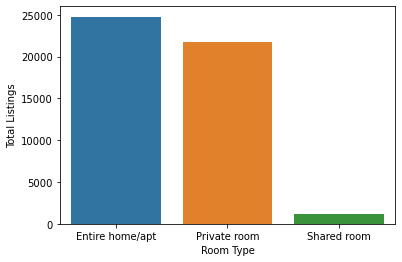

In [81]:
sns.barplot(x=roomTypeData.index, y=roomTypeData.loc[:, "Total Listings"])

- This bar graph shows that:
    - Majority of the people have entire home or private room type listings.
        - This might be due to that people generally want their own private space when traveling and rarely want to share any space with a stranger.
    - Minority of the people have shared room type listings.
        - This might be for people who won't stay in the room for a long time and just need a place to sleep, so they don't mind sharing and saving money. 

### Plot 2

I'm going to make a bar graph to see the average price of every room time.

<AxesSubplot:xlabel='Room Type', ylabel='Avg. Price'>

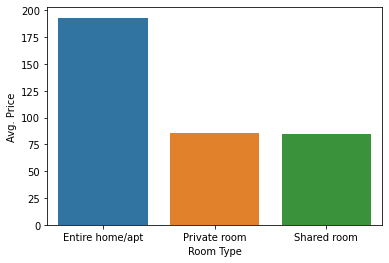

In [82]:
sns.barplot(x=roomTypeData.index, y=roomTypeData.loc[:, "Avg. Price"])

- This bar graph shows that:
    - Private rooms and Shared rooms are almost for the same price in NYC.
        - I feel this might be wrong as we have far more data for Private Rooms compared to Shared Rooms as we saw in the graph above.
        - I feel if we get more data about shared rooms, we'll find that the average of shared rooms is much lower. 
    - Entire apartments are twice as expensive compared to private rooms and shared rooms.
        - I feel this is right as entire apartments means more living area as well as more privacy.
        - Hosts also account for people stealing and damaging the property, which results in a higher price. 